<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 140.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 139.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
#find the number of missing value in Employment, JobSat, and RemoteWork
missing_value_EJR = df[['Employment','JobSat','RemoteWork']].isnull().sum()
print(f"Missing values in Employment, JobSat, and RemoteWork: {missing_value_EJR} ")

Missing values in Employment, JobSat, and RemoteWork: Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64 


In [5]:
# find the percentage of missing values in columns Employment, JobSat, and RemoteWork
total_rows = df.shape[0]
missing_percentage = (missing_value_EJR / total_rows) * 100

# let's handle missing values in JobSat
if missing_percentage['JobSat'] <= 5:
    df = df.dropna(subset=['JobSat'])
else:
    mode_Jobsat = df['JobSat'].mode()[0]
    df['JobSat'].fillna(mode_Jobsat, inplace=True)
# let's handle missing values in RemoteWork
if missing_percentage['RemoteWork'] <= 5:
    df = df.dropna(subset=['RemoteWork'])
else:
    mode_RemoteWork = df['RemoteWork'].mode()[0]
    df['RemoteWork'].fillna(mode_RemoteWork , inplace=True)
print(f"Missing values in JobSat, and RemoteWork: {df[['JobSat','RemoteWork']].isnull().sum()} ")

Missing values in JobSat, and RemoteWork: JobSat        0
RemoteWork    0
dtype: int64 


/tmp/ipykernel_312/4039016414.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(mode_Jobsat, inplace=True)
/tmp/ipykernel_312/4039016414.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here
# let's handle NaN in 'YearsCodePro'.
mode_YearsCodePro = df['YearsCodePro'].mode()[0]
df.fillna({'YearsCodePro': mode_YearsCodePro}, inplace=True)

# lets convert  YearsCodePro in numerical type
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

# Create experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years)
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

#Calculate the median JobSat for each range 
median_sat_by_exp = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


/tmp/ipykernel_312/2274864248.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat_by_exp = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


/tmp/ipykernel_312/1653169679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_sat_by_exp, palette='Blues_d')


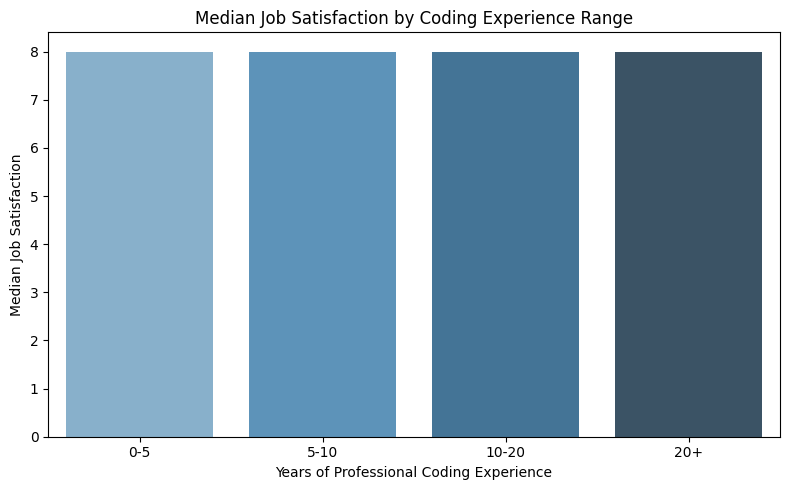

In [7]:
# Visualize the relationship using a bar plot 
plt.figure(figsize=(8, 5))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_sat_by_exp, palette='Blues_d')

plt.title('Median Job Satisfaction by Coding Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


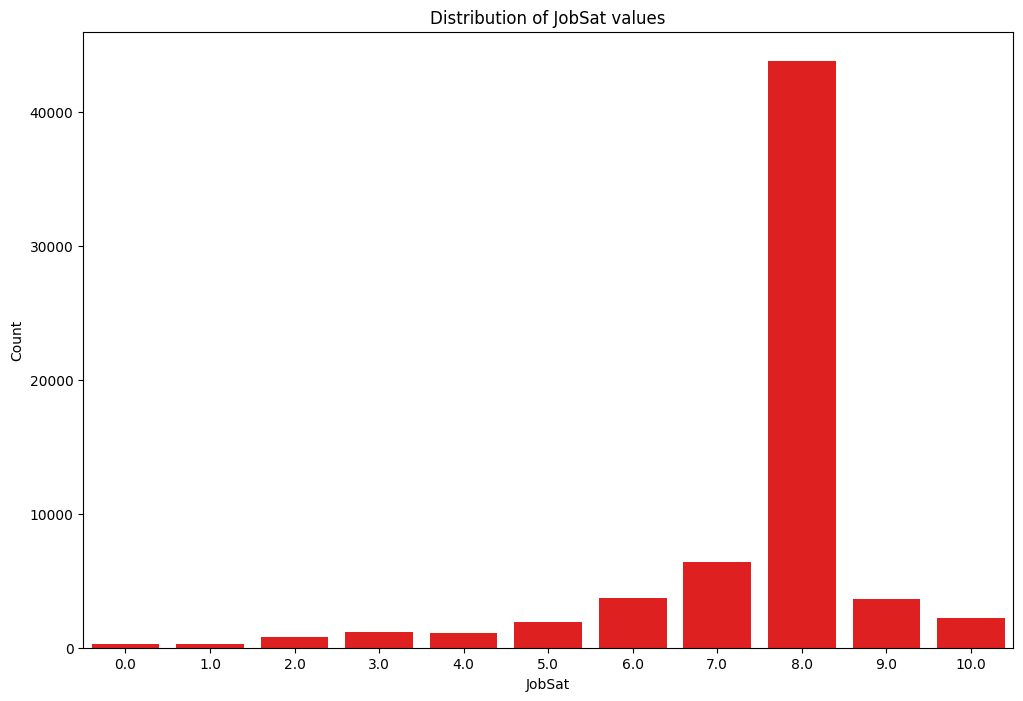

In [8]:
## Write your code here
# Use a count plot to show the distribution of JobSat values
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='JobSat', color='red')
plt.title('Distribution of JobSat values')
plt.xlabel('JobSat')
plt.ylabel('Count')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


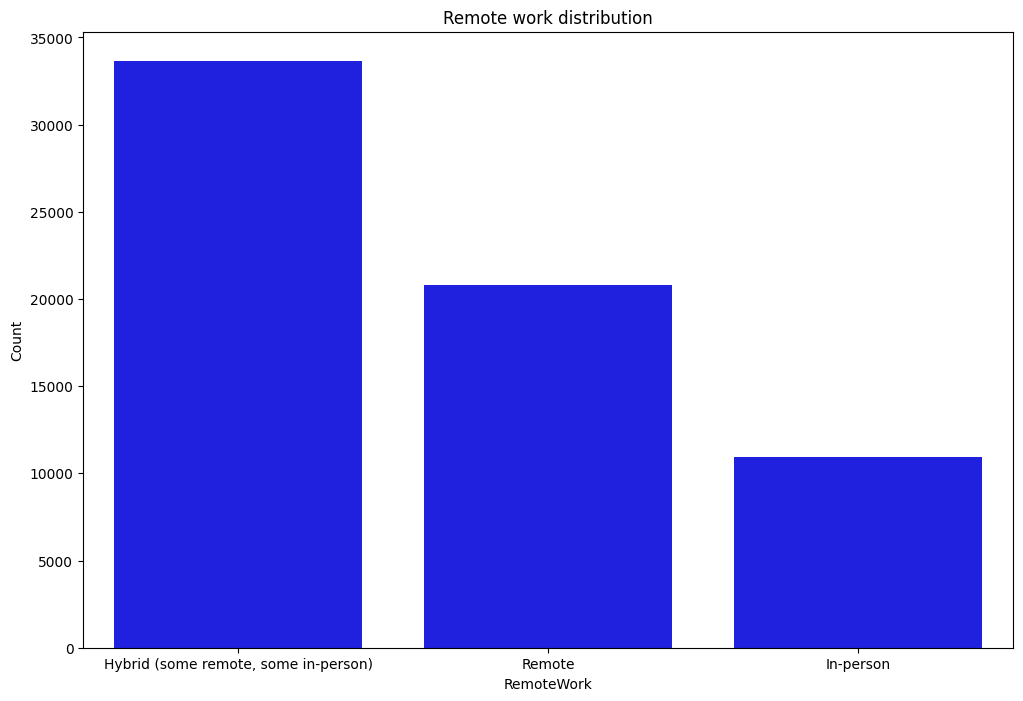

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 44.3   
Employed, full-time;Employed, part-time                                             40.1   
Employed, full-time;Independent contractor, fre...                                  37.4   
Employed, full-time;Independent contractor, fre...                                  43.5   
Employed, full-time;Independent contractor, fre...                                   0.0   
Employed, full-time;Independent contractor, fre...                                   0.0   
Employed, full-time;Independent contractor, fre...                                   0.0   
Employed, full-time;Independent contractor, fre...                                   0.0   
Employed, full-time;Independent contractor, fre...                                   0.0   
Employed, full-time;Independent contractor, fre...                                  43.2   

RemoteWork                                          In-person  Remote  
Employment                                                             
Employed, full-time                                      21.9    33.8  
Employed, full-time;Employed, part-time                  15.1    44.8  
Employed, full-time;Independent contractor, fre...       10.3    52.3  
Employed, full-time;Independent contractor, fre...        9.2    47.3  
Employed, full-time;Independent contractor, fre...      100.0     0.0  
Employed, full-time;Independent contractor, fre...      100.0     0.0  
Employed, full-time;Independent contractor, fre...        0.0   100.0  
Employed, full-time;Independent contractor, fre...      100.0     0.0  
Employed, full-time;Independent contractor, fre...      100.0     0.0  
Employed, full-time;Independent contractor, fre...       14.4    42.4

In [9]:
## Write your code here
# Use a count plot to show remote work distribution.
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, color='blue')
plt.title('Remote work distribution')
plt.xlabel('RemoteWork')
plt.ylabel('Count')
plt.show()

#Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
remote_by_employment = remote_by_employment.round(1)
remote_by_employment.head(10)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [10]:
df['LanguageHaveWorkedWith']

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

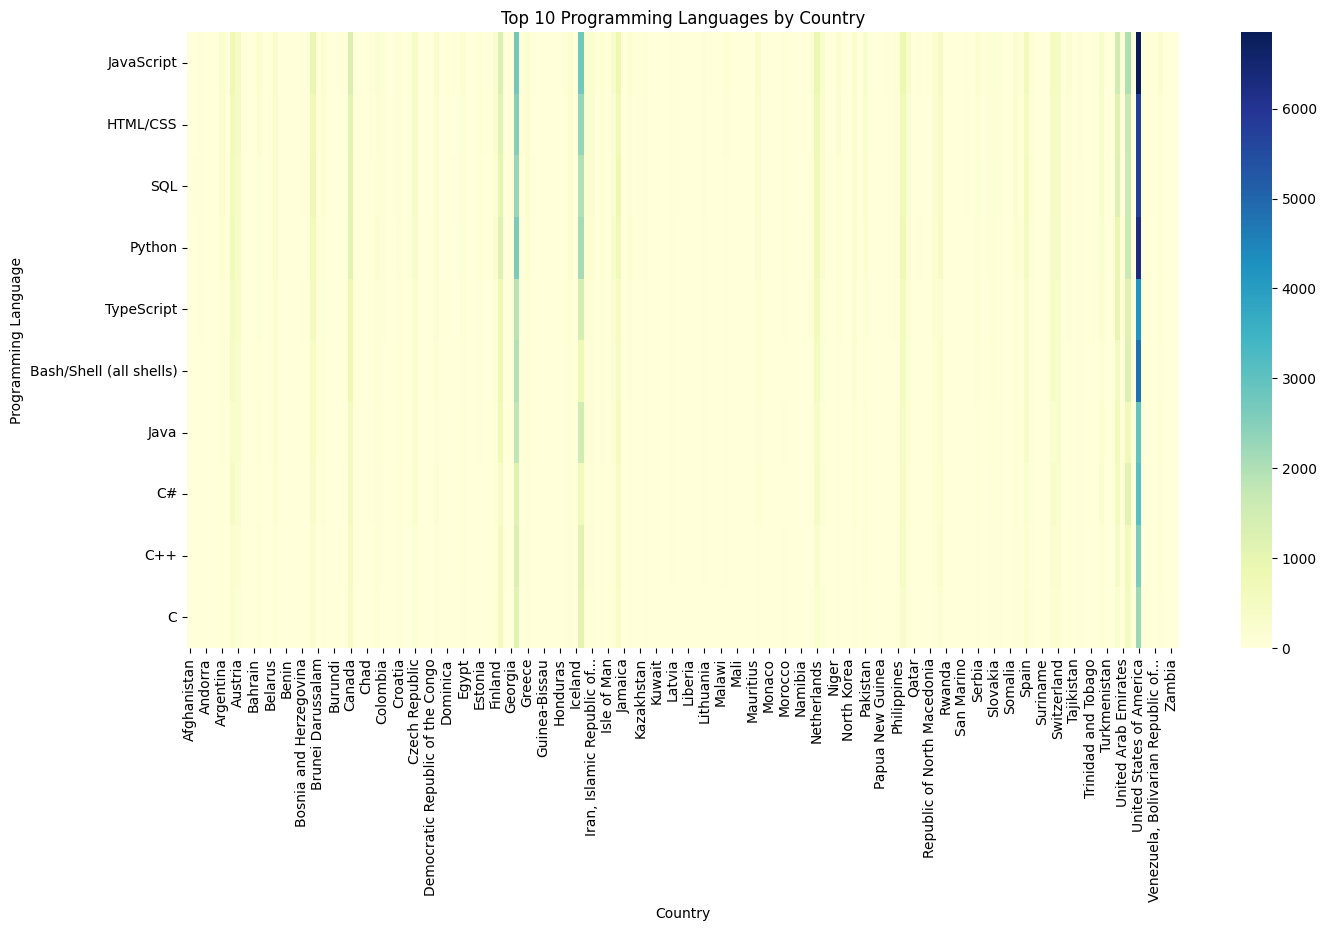

In [25]:
## Write your code here
# Drop rows with missing key columns
df = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])

# Split 'LanguageHaveWorkedWith' into multiple rows per language
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype(str)
df_languages = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Clean whitespace
df_languages['Language'] = df_languages['Language'].str.strip()

# Count how many people in each country use each language
lang_by_country = pd.crosstab(df_languages['Language'], df_languages['Country'])

# Select top 10 languages overall
top_languages = df_languages['Language'].value_counts().head(10).index
top_lang_df = lang_by_country.loc[top_languages]

# Plot
plt.figure(figsize=(16, 8))
sns.heatmap(top_lang_df, cmap='YlGnBu', annot=False)

plt.title('Top 10 Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
# plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


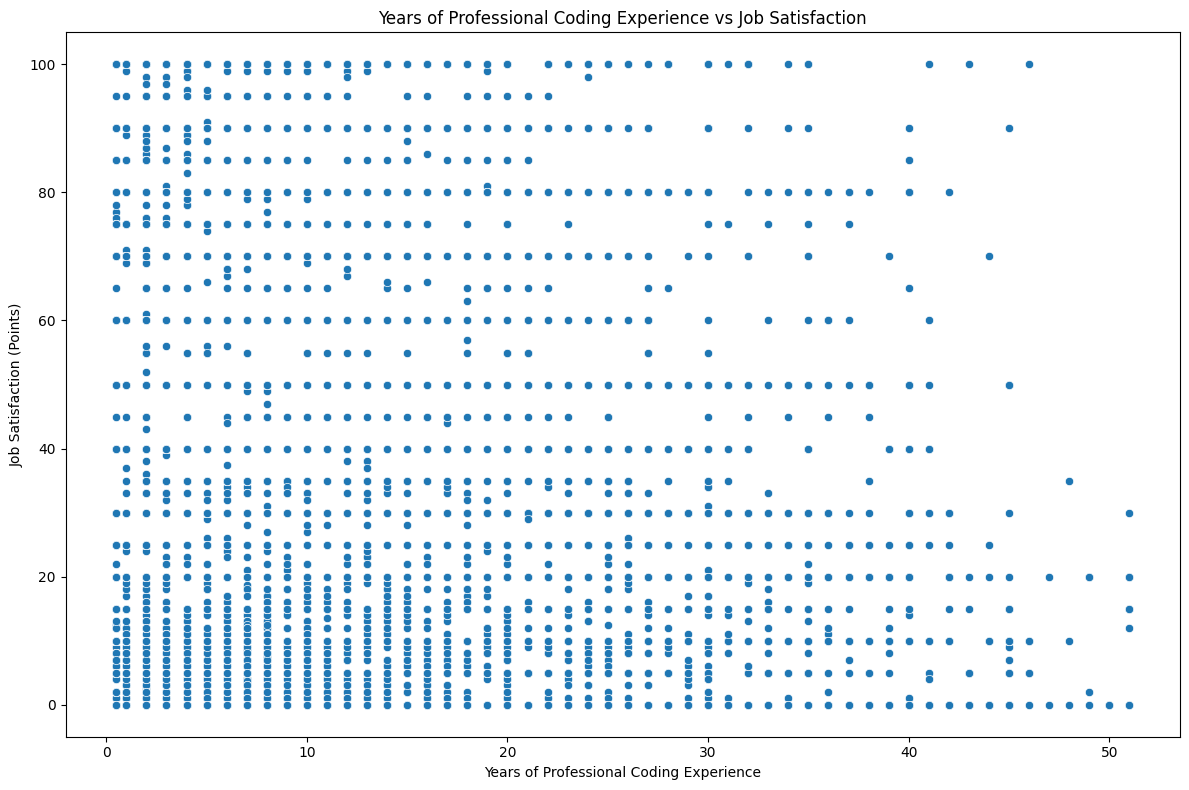

In [29]:
## Write your code here
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# visualise the relationship between YearsCodePro and JobSatPoints_1
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.title('Years of Professional Coding Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_312/2604930364.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='EdLevel', palette='Set2')


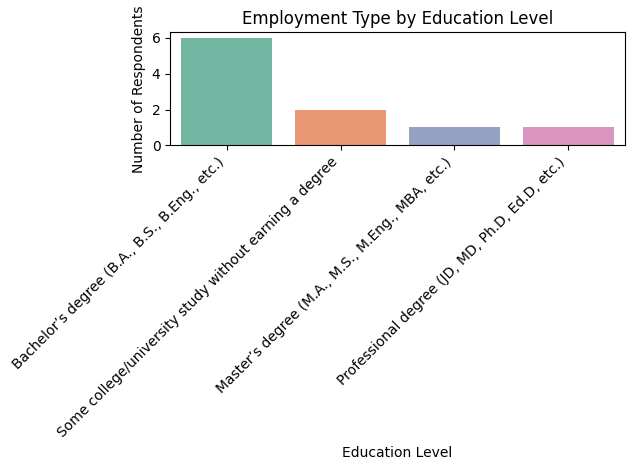

In [40]:
## Write your code here
# Drop missing values in relevant columns
df = df.dropna(subset=['EdLevel', 'Employment'])
# Create cross-tab of counts
ct = pd.crosstab(df['EdLevel'], df['Employment'])
df1 = df.head(10)
#Visualize 
sns.countplot(data=df1, x='EdLevel', palette='Set2')

plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
#plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [41]:
## Write your code here
df.to_csv('modified_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
